# Data Visualization/Exploratory Data Analysis - Assignment 

# Data Collection and Cleaning

## Importing Required Packages

In [38]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [39]:
data = pd.read_csv('C:/Users/maury/Downloads/DataSet/tata.csv')

In [40]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-09,155.334000,161.141998,154.343994,160.212006,128.496658,29347238.0
1,2010-04-12,160.270996,160.270996,153.968994,154.552002,123.957092,29781931.0
2,2010-04-13,154.938004,155.669998,150.604996,153.296005,122.949738,49489395.0
3,2010-04-15,154.343994,157.787994,152.761002,153.423996,123.052391,30353385.0
4,2010-04-16,153.354996,156.214005,153.216995,155.283997,124.544197,17014036.0


In [41]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2505,2020-06-02,90.000000,97.300003,89.750000,96.500000,96.500000,125407771.0
2506,2020-06-03,100.000000,101.449997,97.400002,98.750000,98.750000,90598067.0
2507,2020-06-04,99.000000,101.400002,96.800003,98.500000,98.500000,72078707.0
2508,2020-06-05,100.449997,112.449997,99.050003,110.750000,110.750000,187209208.0
2509,2020-06-08,114.000000,119.150002,113.349998,115.449997,115.449997,136943010.0


## Checking Data Types  

In [42]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

Data Type of 'Date' is object type and others are of float type

In [43]:
#stats of dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2.503000e+03
mean,315.110124,319.604985,310.055880,314.632045,309.719245,1.464909e+07
std,127.348791,128.405744,125.993359,127.127318,130.954874,1.695092e+07
min,66.500000,66.900002,63.500000,65.300003,65.300003,0.000000e+00
25%,202.240997,205.391998,199.782006,202.656502,187.865661,6.189464e+06
50%,295.826996,300.476990,290.299988,295.975006,292.810089,9.265718e+06
75%,422.399994,427.250000,417.199997,421.925003,421.899994,1.556190e+07
max,600.211975,605.901001,589.872986,598.133972,597.891846,1.872092e+08


In [44]:
# Dataset shape
data.shape

(2510, 7)

In [45]:
# Data Profiling
pdp.ProfileReport(data)

In [46]:
# check NA values
data.isna().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [47]:
data[data.isnull().any(axis = 1)]

,Date,Open,High,Low,Close,Adj Close,Volume
437,2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN
476,2012-03-03,NaN,NaN,NaN,NaN,NaN,NaN
606,2012-09-08,NaN,NaN,NaN,NaN,NaN,NaN
648,2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN
985,2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
1214,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN
2359,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Droping rows having null values
data.dropna(axis = 0,inplace = True)

In [49]:
# Checking data again for null values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Now DataSet is free from Null Values

# Checking Data Compatability

In [50]:
# Check datatype
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

Here we have to change only 'Date' datatype and rest are in formatted datatype

In [51]:
data['Date'] = pd.to_datetime(data['Date'])

In [52]:
# checking DataTypes again
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [53]:
# Sorting data according to 'Date'
data.sort_values('Date',inplace = True)

In [54]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-09,155.334000,161.141998,154.343994,160.212006,128.496658,29347238.0
1,2010-04-12,160.270996,160.270996,153.968994,154.552002,123.957092,29781931.0
2,2010-04-13,154.938004,155.669998,150.604996,153.296005,122.949738,49489395.0
3,2010-04-15,154.343994,157.787994,152.761002,153.423996,123.052391,30353385.0
4,2010-04-16,153.354996,156.214005,153.216995,155.283997,124.544197,17014036.0
5,2010-04-19,151.623993,154.246002,151.059998,153.513000,123.123779,18251422.0
6,2010-04-20,153.751007,158.074005,153.751007,156.787994,125.750473,21190376.0
7,2010-04-21,157.154007,160.677002,153.384995,160.162003,128.456543,24958474.0
8,2010-04-22,159.667007,169.126007,158.500000,165.554001,132.781174,53118710.0
9,2010-04-23,165.820999,167.899002,163.744003,167.098007,134.019501,28966139.0


# Univariate Analysis

## Data Visualization 

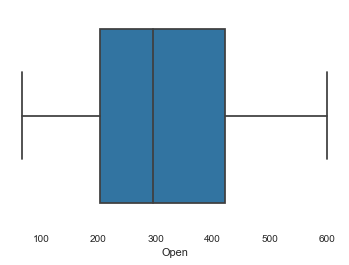

In [55]:
sns.boxplot(data['Open'])
plt.show()

 Here we can see that 33% quartile is near 200,median is around 300 and 66% quartile is around 420. There are no outliers in the 'Open' Column.

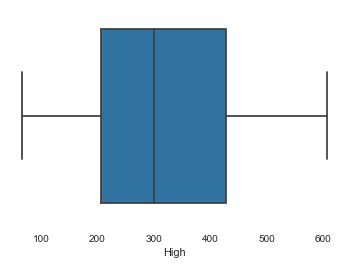

In [56]:
sns.boxplot(data['High'])
plt.show()

Here we can see that 33% quartile is near 200,median is around 300 and 66% quartile is around 430-435. There are no outliers in the 'High' Column.

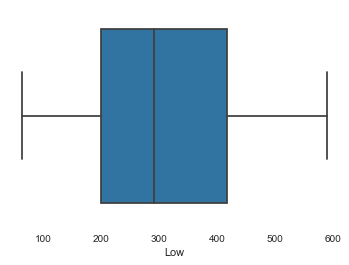

In [60]:
sns.boxplot(data['Low'])
plt.show()

Here we can see that 33% quartile is near 200,median is around 300 and 66% quartile is around 410-420. There are no outliers in the 'Low' Column.

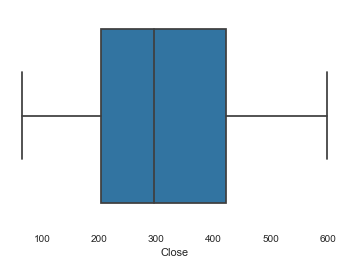

In [61]:
sns.boxplot(data['Close'])
plt.show()

Here we can see that 33% quartile is near 200,median is around 300 and 66% quartile is around 410-420. There are no outliers in the 'Close' Column.

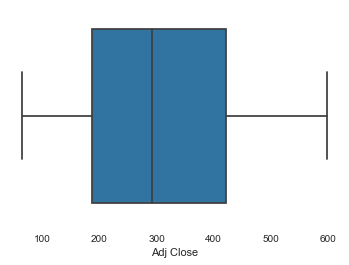

In [62]:
sns.boxplot(data['Adj Close'])
plt.show()

Here we can see that 40% quartile is near 190-200,median is around 290-300 and 60% quartile is around 410-420. There are no outliers in the 'Adj Close' Column.

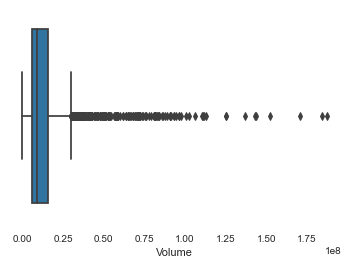

In [63]:
sns.boxplot(data['Volume'])
plt.show()

Here we can see that there are so many outliers in the data.

# Distribution of Data

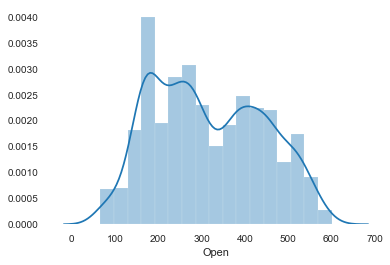

In [85]:
sns.distplot(data['Open'])
plt.show()

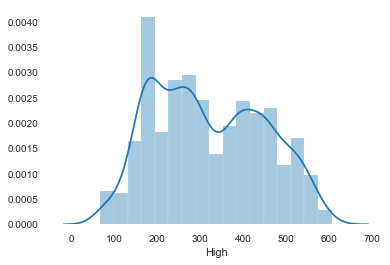

In [86]:
sns.distplot(data['High'])
plt.show()

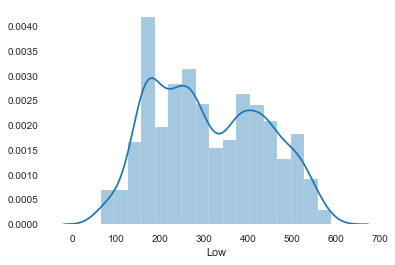

In [87]:
sns.distplot(data['Low'])
plt.show()

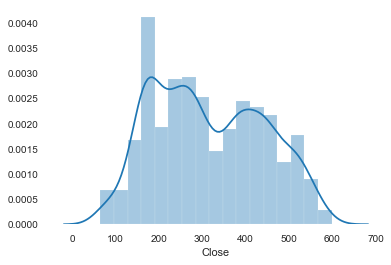

In [88]:
sns.distplot(data['Close'])
plt.show()

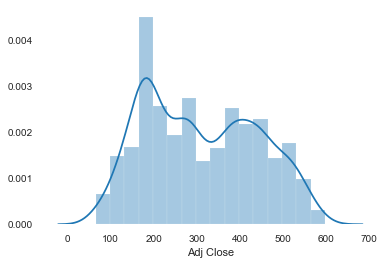

In [89]:
sns.distplot(data['Adj Close'])
plt.show()

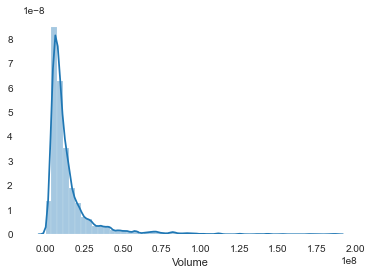

In [90]:
sns.distplot(data['Volume'])
plt.show()

# Bivariate Analysis

In [91]:
# list of columns of data
columns = data.columns
# 'Date' column deletion
columns = columns[1:]
columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

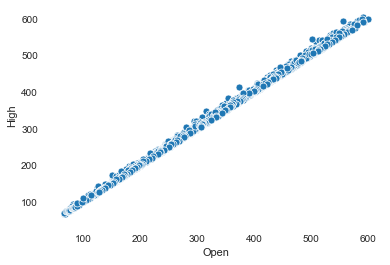

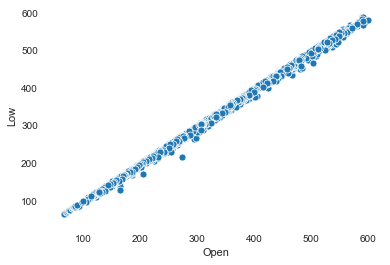

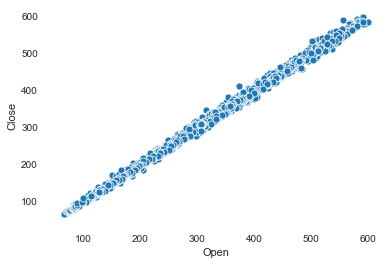

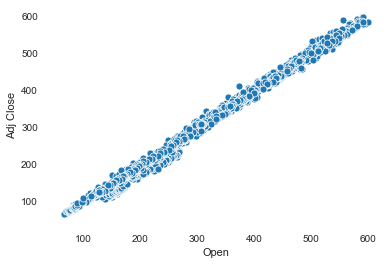

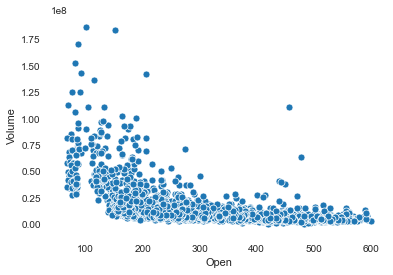

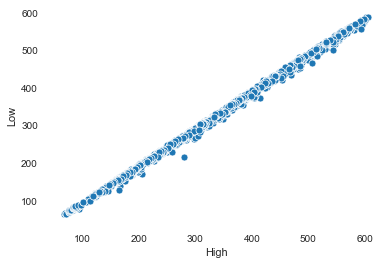

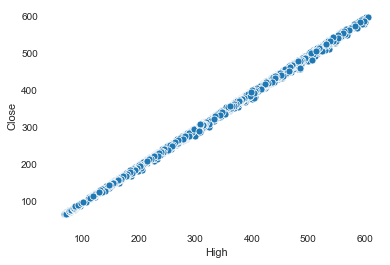

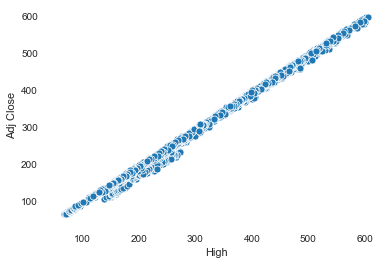

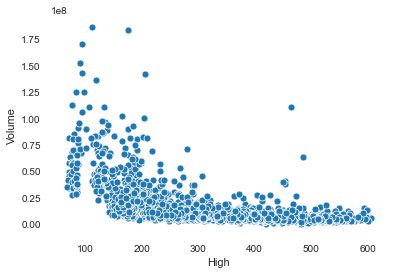

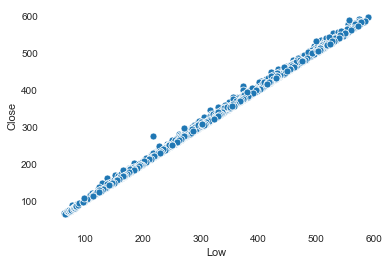

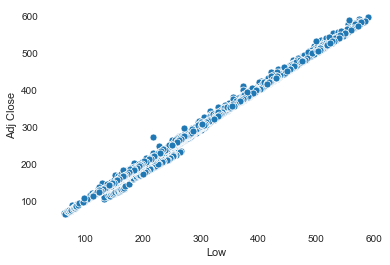

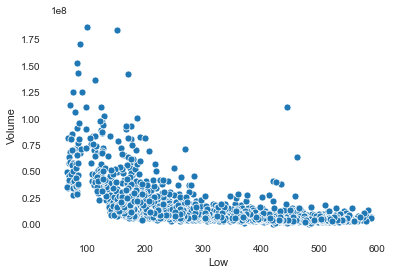

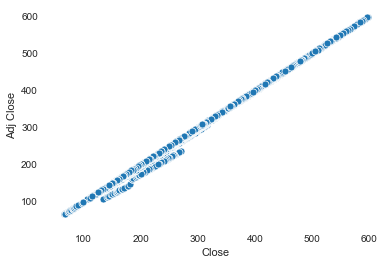

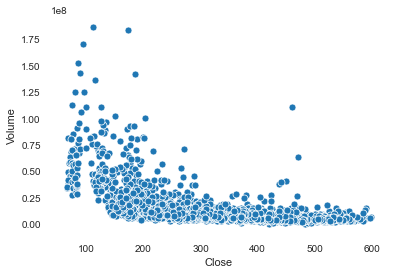

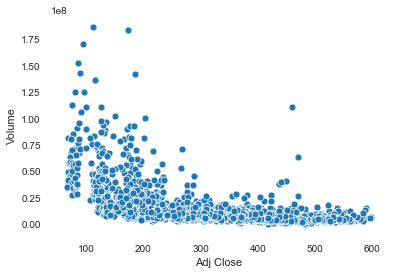

In [92]:
#plotting scatter plot between each column to know the bivariate distribution of the data
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        if i == j:
            continue
        else:
            sns.scatterplot(data[columns[i]],data[columns[j]])
            plt.show()

# Outliers Checking

In [94]:
#Importing required packages
from scipy import stats

In [96]:
# we use zscore to identify outliers.
# If zscore is greater than 3 or less than -3 then it will be considered as outlier

## Outliers in 'Open' Column 

In [102]:
open = stats.zscore(data['Open'])
print(open.min())
print(open.max())

-1.9525886320982753
2.239195350744357


No Outliers in 'Open' Column

## Outliers in 'High' Column  

In [103]:
high = stats.zscore(data['High'])
print(high.min())
print(high.max())

-1.9684125509543309
2.230065528318003


No Outliers in 'High' Column

## Outliers in 'Low' Column 

In [104]:
close = stats.zscore(data['Close'])
print(close.min())
print(close.max())

-1.9616701378675516
2.2305085955497526


No Outliers in 'Low' Column

## Outliers in 'Adj Close' Column 

In [105]:
adjclose = stats.zscore(data['Adj Close'])
print(adjclose.min())
print(adjclose.max())

-1.866811623687987
2.2009885877052326


No Outliers in 'Adj Close' Column

## Outliers in 'Volume' Column 

In [106]:
vol = stats.zscore(data['Volume'])
print(vol.min())
print(vol.max())

-0.8643792468299119
10.182021659862707


There are Outliers in 'Volume' Column

# Removing Outliers 

In [112]:
vol = abs(vol)
outlier = np.where(vol > 3)
outlier = list(outlier[0])
print(outlier)

[86, 87, 656, 1515, 2099, 2183, 2216, 2217, 2222, 2294, 2310, 2314, 2315, 2319, 2320, 2321, 2323, 2324, 2325, 2330, 2344, 2347, 2353, 2354, 2355, 2378, 2384, 2385, 2418, 2419, 2420, 2422, 2432, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2463, 2464, 2465, 2466, 2469, 2477, 2478, 2483, 2484, 2485, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502]


In [113]:
data.shape

(2437, 7)

In [118]:
data.drop(outlier,inplace = True)

In [119]:
data.shape

(2437, 7)

Outliers Removed From Data

# Correlation Matrix 

In [120]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999406,0.999327,0.998700,0.996423,-0.514988
High,0.999406,1.000000,0.999339,0.999555,0.997320,-0.509011
Low,0.999327,0.999339,1.000000,0.999432,0.997044,-0.518687
Close,0.998700,0.999555,0.999432,1.000000,0.997624,-0.512351
Adj Close,0.996423,0.997320,0.997044,0.997624,1.000000,-0.500368
Volume,-0.514988,-0.509011,-0.518687,-0.512351,-0.500368,1.000000


Here, We can see that there is a positive and high correlation among 'Open','High','Low','Close','Adj Close'. 'Volume' is negatively correlated with other columns.

In [121]:
corr_matrix = data.corr()

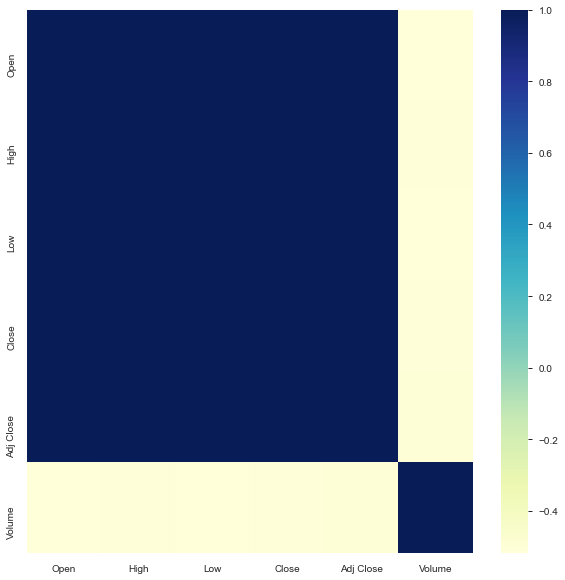

In [128]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr_matrix,ax = ax,cmap = 'YlGnBu')

There is highly correlation between the following

Open with High,Low,Close,Adj Close

High with Open,Low,Close,Adj Close

Low with Open,High,Close,Adj Close

Close with Open,High,Low,Adj Close

Adj Close with Open,High,Low,Close

Below are very less correlated

Volume and all other columns